# <font color="#5fa8d3"> Check Photos

## <font color="#62b6cb"> 0. Libraries Importation & Funtions Definition

**Libraries Importation**

In [1]:
import json # to import jsons
import pandas as pd # to manipulate datasets
import numpy as np # to perform numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting nicer
from scipy.stats import gamma
import yaml # for importing a yaml file
from src.mymodule import * # for importing our functions

In [13]:
current_directory = os.getcwd()
last_folder = os.path.basename(current_directory)
    
if last_folder != "project-danielteresa":
    while last_folder != "project-danielteresa":
        parent_directory = os.path.dirname(current_directory)
        last_folder = os.path.basename(parent_directory)

        os.chdir(parent_directory)
        print(f"Changed directory to: {parent_directory}")
else:
    print("Already in the project root directory.")

Changed directory to: C:\Users\daniq\PycharmProjects\project-danielteresa


**Configuration Variables**

In [2]:
# Load the YAML file
with open('..\config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Function to set variables globally and store their names
def set_variables(config, prefix='', var_dict={}):
    for key, value in config.items():
        if isinstance(value, dict):
            set_variables(value, prefix + key + '_', var_dict)
        else:
            globals()[prefix + key] = value
            var_dict[prefix + key] = value
    return var_dict

# Set variables globally and get a dictionary of the set variables
set_vars = set_variables(config)

# Print all the variables that were set
print("Variables set from YAML file:")
for var_name, var_value in set_vars.items():
    print(f"{var_name}: {var_value}")

Variables set from YAML file:
seed: 123
color1: #62b6cb
color2: #fb8500
path_annotations: ./Data
path_train: ./Data/train/original
path_train_train: ./Data/train/train
path_train_aug: ./Data/train/train_aug
path_train_val: ./Data/train/val
path_test: ./Data/test
kaggle_train_annotations: annotations_train.json
train_annotations_name_temp: annotations_train_temp.json
train_annotations_name: annotations_train_updated.json
aug_train_annotations_name: annotations_train_updated_aug.json
val_annotations_name: annotations_val_updated.json
kaggle_test_annotations: annotations_test.json
test_annotations_name_temp: annotations_test_temp.json
test_annotations_name: annotations_test_updated.json
path_yolo: ./Data/Yoloimages/
weights_yolo_path: ./yolo_weights
aux_trainaug_folder: ./CustomImages/aux_trainaug/
aux_train_folder: ./CustomImages/aux_train/
aux_val_folder: ./CustomImages/aux_val/
coco_to_yolo_folder: labels/annotations


## <font color="#62b6cb"> 1. Photo Checker

**Classes explanation**

* mat_bo_phan=lost parts (Miscellaneous Damage)
* rach=torn (Metal damage tear)
* mop_lom=dented (Metal damage dent)
* tray_son=paint scratches (Metal damage scratches)
* thung=puncture (Miscellaneous Damage)
* vo_kinh=broken glass (Glass damage crack)
* be_den= broken lamp (Miscellaneous Damage)

**New Classes explanation**

* mis_lost = lost parts (Miscellaneous Damage)
* met_tear = torn (Metal damage tear)
* met_scratch = paint scratches (Metal damage scratches)
* glass_crack = broken glass (Glass damage crack)
* mis_punct = puncture (Miscellaneous Damage)
* mis_lamp = broken lamp (Miscellaneous Damage)
* met_dent_minor = dented (Metal damage dent) - minor damage
* met_dent_medium = dented (Metal damage dent) - medium damage
* met_dent_severe = dented (Metal damage dent) - severe damage

In [17]:
file_path = os.path.join(path_annotations, train_annotations_name)
print("File path:", file_path)
os.getcwd()

File path: ./Data\annotations_train_updated.json


'C:\\Users\\daniq\\PycharmProjects\\project-danielteresa'

In [18]:
# read JSON
with open(os.path.join(path_annotations, train_annotations_name  ), "r") as f:
    coco_data = json.load(f)

In [19]:
# we extract images with this damage type
class_name="met_scratch"
data_class = extract_coco_data(coco_data, class_name)

In [20]:
data_class.keys()

dict_keys(['01012020_172204image891741.jpg', '01012020_172251image12370.jpg', '01022020_102246image365727.jpg', '01022020_102910image826484.jpg', '01022020_102915image195873.jpg', '01022020_104503image975717.jpg', '01062020_140753image325319.jpg', '01092020_102550image198263.jpg', '01102020_083317image942666.jpg', '01102020_090113image322914.jpg', '01102020_090118image320747.jpg', '01102020_093402image379364.jpg', '01102020_101505image297414.jpg', '01102020_110059image489580.jpg', '01102020_123300image197233.jpg', '01102020_143031image489708.jpg', '01102020_143056image182519.jpg', '01102020_143840image178149.jpg', '01102020_143937image848597.jpg', '01102020_144508image667829.jpg', '01122020_121429image23865.jpg', '01122020_121436image945422.jpg', '01122020_121439image927412.jpg', '01122020_150910image418017.jpg', '02012020_075655image379675.jpg', '02012020_081258image799317.jpg', '02012020_081304image662836.jpg', '02012020_081310image316823.jpg', '02012020_081317image851661.jpg', '0201

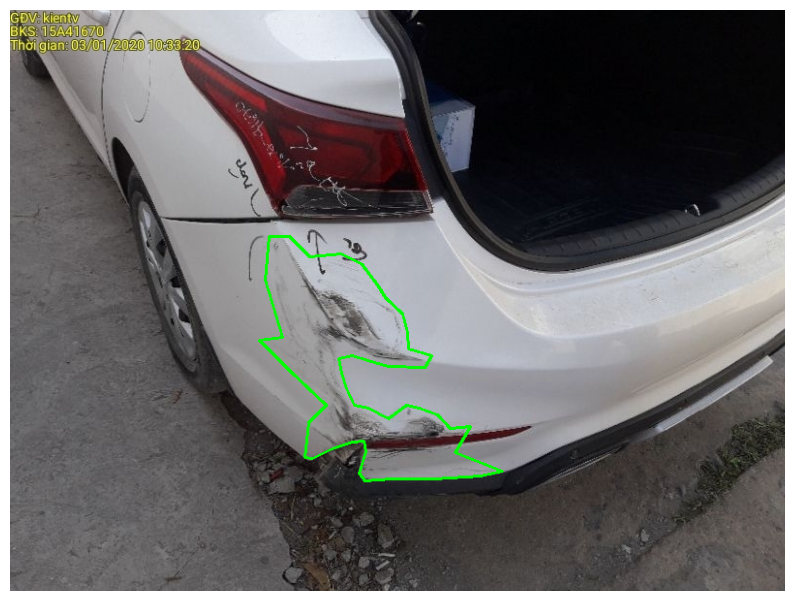

In [24]:
plot_photo_df(path_train_train,'03012020_103315image385579.jpg', data_class)